In [653]:
import json
import pickle

# MARKABLE
with open('../datasets/markable/annotations/markable_trainval.json') as json_file:
    data = json.load(json_file)
# with open('../output/markable/1/predictions.pkl', 'rb') as predf:
#     data_pred = pickle.load(predf)
# with open('../output/markable/1/target.pkl', 'rb') as predf:
#     data_target = pickle.load(predf)
# assert len(data_pred[0]) == len(data_target[0]) == len(data['annotations']), "Size mismatch!!!!."    
    


    
# # PASCAL
# with open('../datasets/voc/annotations/pascal_test2007.json') as json_file:
#     data = json.load(json_file)
# with open('../output/voc/1/predictions.pkl', 'rb') as predf:
#     data_pred = pickle.load(predf)
# with open('../output/voc/1/target.pkl', 'rb') as predf:
#     data_target = pickle.load(predf)
# assert len(data_pred[0]) == len(data_target[0]) == len(data['annotations']), "Size mismatch!!!!."    
    

    

    

# COCO
# with open('../datasets/coco/annotations/instances_val2017.json') as json_file:
#     data = json.load(json_file)
# with open('../output/coco/1/predictions.pkl', 'rb') as predf:
#     data_pred = pickle.load(predf)
# with open('../output/coco/1/target.pkl', 'rb') as predf:
#     data_target = pickle.load(predf)
# assert len(data_pred[0]) == len(data_target[0]) == len(data['annotations']), "Size mismatch!!!!."    
        
    
    


In [654]:
print(F"IMAGES: {len(data['images'])}     ANNOTATIONS: {len(data['annotations'])})")

IMAGES: 206530     ANNOTATIONS: 776172)


In [97]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)
    
    # return the resized image
    return resized

In [4]:
data_gt.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [77]:
data_gt['images'][-1]

{'file_name': '28f6b9b9ec9c638e207ce708ff8b64b2.jpg',
 'height': 240,
 'width': 320,
 'id': 9}

In [11]:
mapp = {}
for idx, v in enumerate(data_gt['images']):
    mapp[v['id']] =  idx

In [94]:
len(data_gt['annotations'])
# mapp

14976

In [84]:
data_gt['annotations'][0]['bbox']

[473.07, 395.93, 38.65, 28.67]

In [77]:
data_gt['images'][5]

{'file_name': '000008.jpg', 'height': 375, 'width': 500, 'id': 8}

In [60]:
import secrets
secrets.token_hex(nbytes=16)
# '17adbcf543e851aa9216acc9d7206b96'

'3609d8df47ad1a5d1b90e6c41d5e59ee'

In [62]:
import imutils
img = imutils.resize(img, width=1280)

ModuleNotFoundError: No module named 'imutils'

In [580]:
import cv2, os, numpy as np
import json 

model = 'fcos'    
mtype = 'white'

pred_file= '/home/ali/markable-production/object_detection_context/outputs_invariance/coco/'+  mtype +'_' + model + '.bbox.json'
# source_path = '/home/ali/markable-production/object_detection_context/datasets/coco/val2017'
# dest_path = '/home/ali/markable-production/object_detection_context/datasets/coco/val2017'  + background + 'BG' 

with open('../datasets/coco/annotations/instances_val2017_invariance_' + mtype +'BG.json') as json_file:
    data_gt = json.load(json_file)
with open(pred_file) as json_file:
    data_pred = json.load(json_file)



In [581]:

len(data_gt['annotations'])
len(data_pred)
data_gt['annotations'][0]



{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [585]:
avg_size = {}
cat_names = []
for i in data_gt['categories']:
    cat_names.append(i['name'])
    avg_size[i['id']] = []


for k in data_gt['annotations']: 
    avg_size[k['category_id']].append(k['area'])


In [595]:
mean_sizes = {}
for idx,i in enumerate(avg_size):
    print(f"Mean size of {cat_names[idx]} is: {np.mean(avg_size[i])}")
    mean_sizes[cat_names[idx]] = np.mean(avg_size[i])

Mean size of person is: 11229.258878189748
Mean size of bicycle is: 7934.951423417722
Mean size of car is: 4394.142077070393
Mean size of motorcycle is: 19468.91616765499
Mean size of airplane is: 17651.008825874127
Mean size of bus is: 42167.09191859649
Mean size of train is: 58991.700265263156
Mean size of truck is: 17885.25483614458
Mean size of boat is: 6619.410174186047
Mean size of traffic light is: 1315.2678210361066
Mean size of fire hydrant is: 18578.385781683173
Mean size of stop sign is: 20369.914425333336
Mean size of parking meter is: 12880.504734166667
Mean size of bench is: 12850.983122397094
Mean size of bird is: 4264.32510375
Mean size of cat is: 47751.2286509901
Mean size of dog is: 34280.54347729358
Mean size of horse is: 14517.29586025641
Mean size of sheep is: 10497.761506232688
Mean size of cow is: 10702.227661578945
Mean size of elephant is: 28750.78149176471
Mean size of bear is: 48900.16824225353
Mean size of zebra is: 20327.293637126866
Mean size of giraffe is

In [625]:
sorted_mean_sizes = sorted(mean_sizes.items(), key = lambda x:x[1])

In [627]:
list(mean_sizes.items())

[('person', 11229.258878189748),
 ('bicycle', 7934.951423417722),
 ('car', 4394.142077070393),
 ('motorcycle', 19468.91616765499),
 ('airplane', 17651.008825874127),
 ('bus', 42167.09191859649),
 ('train', 58991.700265263156),
 ('truck', 17885.25483614458),
 ('boat', 6619.410174186047),
 ('traffic light', 1315.2678210361066),
 ('fire hydrant', 18578.385781683173),
 ('stop sign', 20369.914425333336),
 ('parking meter', 12880.504734166667),
 ('bench', 12850.983122397094),
 ('bird', 4264.32510375),
 ('cat', 47751.2286509901),
 ('dog', 34280.54347729358),
 ('horse', 14517.29586025641),
 ('sheep', 10497.761506232688),
 ('cow', 10702.227661578945),
 ('elephant', 28750.78149176471),
 ('bear', 48900.16824225353),
 ('zebra', 20327.293637126866),
 ('giraffe', 16089.541092672413),
 ('backpack', 2605.235291778976),
 ('umbrella', 10491.613948426151),
 ('handbag', 2158.8130366666664),
 ('tie', 2892.176365354331),
 ('suitcase', 13035.762723432343),
 ('frisbee', 2392.7893791304346),
 ('skis', 1221.584

In [610]:
sorted_mean_sizes

[('sports ball', 755.4343863117871),
 ('skis', 1221.5842350622406),
 ('traffic light', 1315.2678210361066),
 ('knife', 1687.0873302147243),
 ('baseball glove', 1946.4996016891894),
 ('spoon', 1954.163127075099),
 ('toothbrush', 2051.722413157895),
 ('baseball bat', 2099.681424315069),
 ('handbag', 2158.8130366666664),
 ('kite', 2390.7514126488095),
 ('frisbee', 2392.7893791304346),
 ('remote', 2468.1566902826853),
 ('backpack', 2605.235291778976),
 ('book', 2652.776440697674),
 ('mouse', 2673.278578773585),
 ('bottle', 2857.236907902439),
 ('tie', 2892.176365354331),
 ('snowboard', 2994.3719050724635),
 ('fork', 3037.8724483720925),
 ('wine glass', 3319.597305830904),
 ('carrot', 4062.0843568733158),
 ('cup', 4259.573029922136),
 ('bird', 4264.32510375),
 ('car', 4394.142077070393),
 ('tennis racket', 4553.473930444444),
 ('skateboard', 4987.592025418993),
 ('chair', 5435.060967699608),
 ('surfboard', 5563.52663401487),
 ('hair drier', 6514.600272727273),
 ('boat', 6619.410174186047),


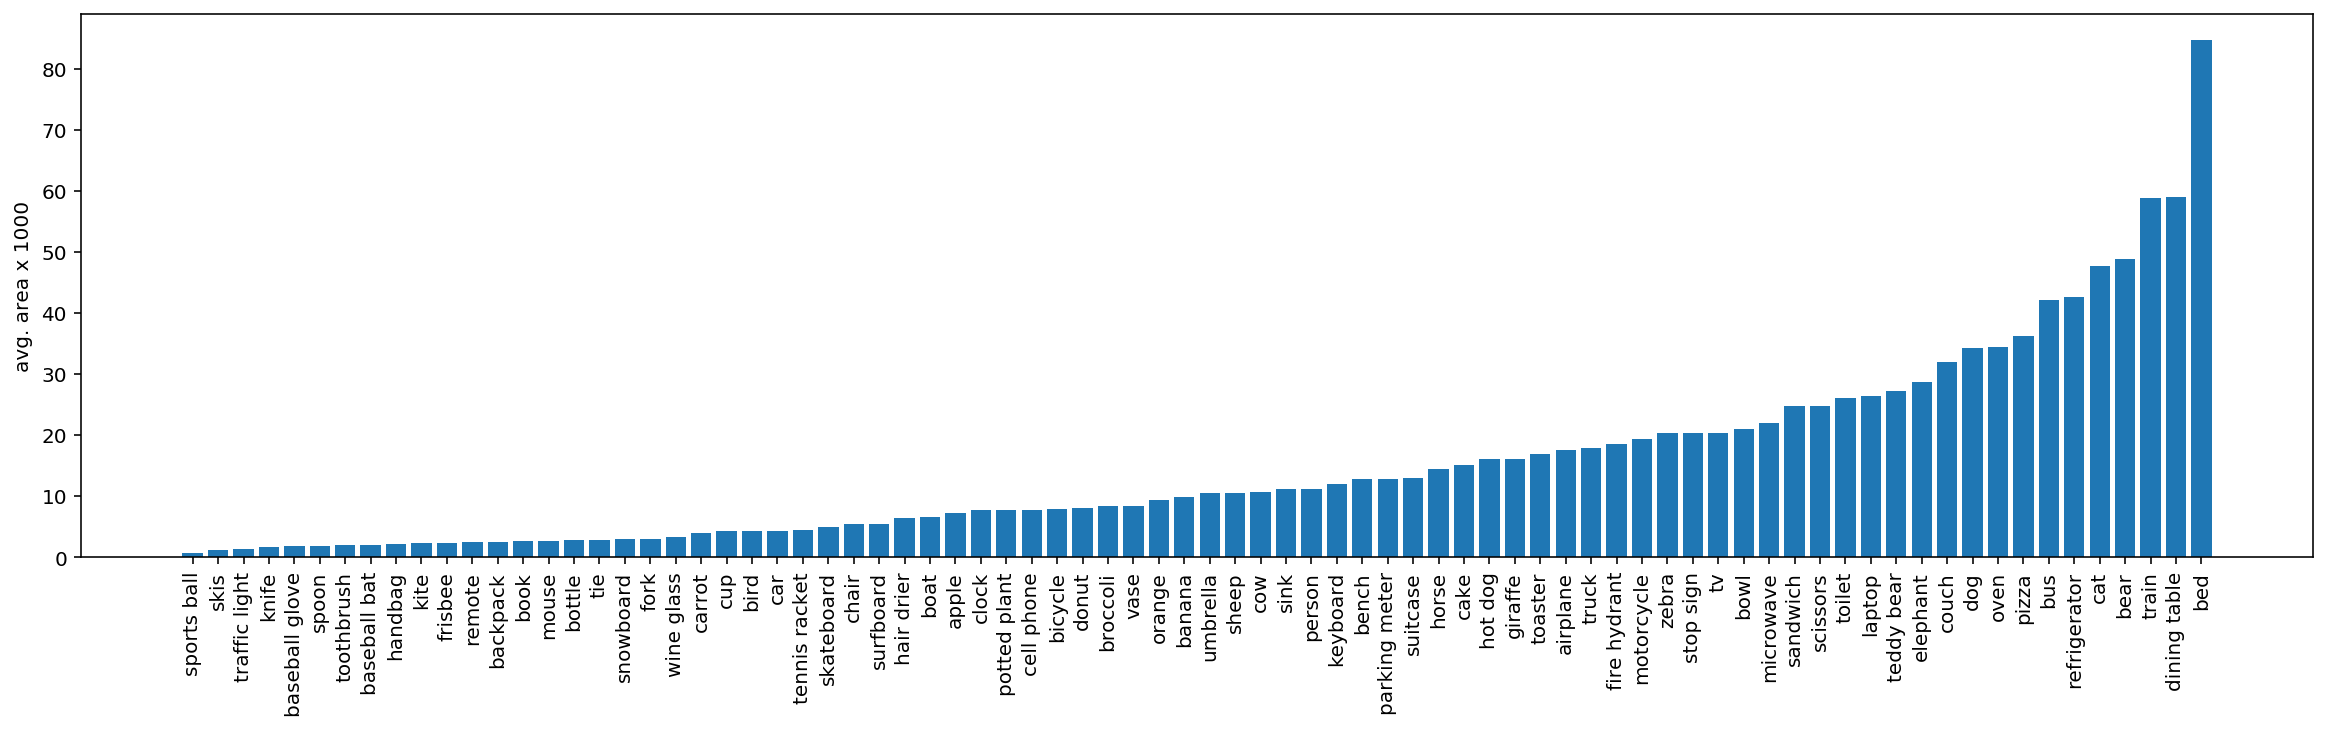

In [624]:
xx = [t/1000 for o, t in sorted_mean_sizes]
ticks = [o for o, t in sorted_mean_sizes]
fig = plt.figure(figsize = (20,5))
plt.bar(range(len(sorted_mean_sizes)), xx)
plt.xticks(range(len(sorted_mean_sizes)), ticks, rotation = 90)
plt.ylabel('avg. area x 1000')
plt.show()
fig.savefig('avg_size.jpg')

In [615]:
xx

['sports ball',
 'skis',
 'traffic light',
 'knife',
 'baseball glove',
 'spoon',
 'toothbrush',
 'baseball bat',
 'handbag',
 'kite',
 'frisbee',
 'remote',
 'backpack',
 'book',
 'mouse',
 'bottle',
 'tie',
 'snowboard',
 'fork',
 'wine glass',
 'carrot',
 'cup',
 'bird',
 'car',
 'tennis racket',
 'skateboard',
 'chair',
 'surfboard',
 'hair drier',
 'boat',
 'apple',
 'clock',
 'potted plant',
 'cell phone',
 'bicycle',
 'donut',
 'broccoli',
 'vase',
 'orange',
 'banana',
 'umbrella',
 'sheep',
 'cow',
 'sink',
 'person',
 'keyboard',
 'bench',
 'parking meter',
 'suitcase',
 'horse',
 'cake',
 'hot dog',
 'giraffe',
 'toaster',
 'airplane',
 'truck',
 'fire hydrant',
 'motorcycle',
 'zebra',
 'stop sign',
 'tv',
 'bowl',
 'microwave',
 'sandwich',
 'scissors',
 'toilet',
 'laptop',
 'teddy bear',
 'elephant',
 'couch',
 'dog',
 'oven',
 'pizza',
 'bus',
 'refrigerator',
 'cat',
 'bear',
 'train',
 'dining table',
 'bed']

In [609]:
data_gt['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

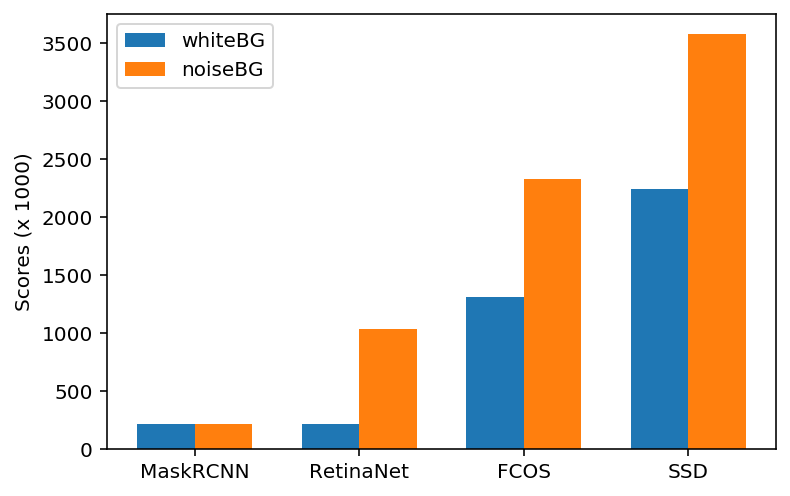

In [579]:
# print(data_gt['annotations'][21952])
# print(data_gt['images'][21952])
# data_pred

# number of detected boxes
# retina - white  1029369
# retina - noise  1540733
# maskRCNN white   209094
# maskRCNN noise   214769
# SSD white    2236791
# SSD noise    3570051
# fcos noise   2320184
# fcos white    1302592

num_boxes = [1029369, 1540733, 209094, 214769, 2236791, 3570051, 2320184, 1302592]

# plt.bar(range(8), num_boxes)



labels = ['MaskRCNN', 'RetinaNet', 'FCOS', 'SSD']
whiteBG = [209094, 209094, 1302592, 2236791]
noiseBG = [214769, 1029369, 2320184, 3570051]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, np.array(white)/1000, width, label='whiteBG')
rects2 = ax.bar(x + width/2, np.array(noise)/1000, width, label='noiseBG')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (x 1000)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.savefig('num_boxes.jpg')



In [78]:
print(data_gt['images'][0])
print(data_gt['annotations'][0])
print(data_pred[0])

{'file_name': 'd0e29c46f2fa161cd70134a45cf3d51b.jpg', 'height': 640, 'width': 529, 'id': 0}
{'segmentation': [[510.66, 423.01, 511.72, 420.03, 510.45, 416.0, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 496.33, 414.51, 501.1, 411.96, 502.06, 411.32, 5

In [545]:
# predictions all scores
image = np.zeros((200,200))
data_gt_imgs = data_gt['images']
for idx, i in enumerate(data_pred):
#     if idx >1000000:
#          break
    if i['score'] > 0.5:    
        img = np.zeros((data_gt_imgs[i['image_id']]['height'], data_gt_imgs[i['image_id']]['width']))
        x1,y1,w,h = i['bbox']
        x1,y1,w,h = np.array((x1,y1,w,h)).astype('int')
        img[x1:x1+w, y1:y1+h] = 1

        resized = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)

        image += resized
    
    
    


    

In [158]:
import matplotlib.pyplot as plt


In [503]:
# plt.imshow(image)
# plt.colorbar()

In [369]:
# ground-truth
image_annt = np.zeros((200,200))
data_gt_imgs = data_gt['images']
for idx, i in enumerate(data_gt['annotations']):
#     if idx >1000000:
#         break
    img = np.zeros((data_gt_imgs[i['image_id']]['height'], data_gt_imgs[i['image_id']]['width']))
    x1,y1,w,h = i['bbox']
    x1,y1,w,h = np.array((x1,y1,w,h)).astype('int')
    img[x1:x1+w, y1:y1+h] = 1
    
    resized = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)
    
    image_annt += resized
    

In [504]:
# i
# # data_gt[i['image_id']]
# # data_gt[0]

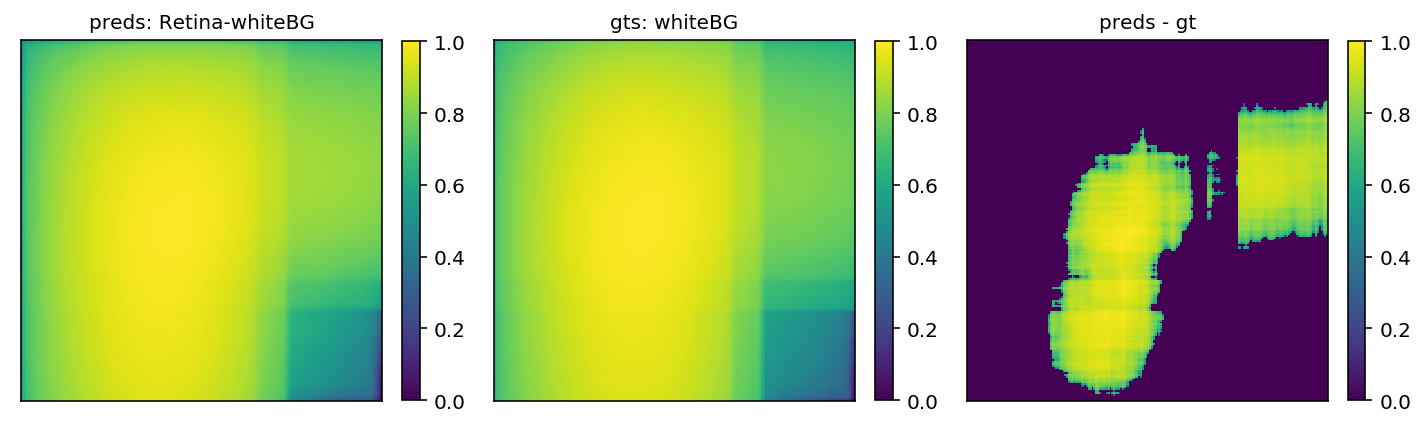

In [546]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib 

# fig = plt.figure(figsize=(10,10)) #.subplots()
# plt.subplot(1,4,1)
# plt.imshow(image)
# plt.xticks([])
# plt.yticks([])

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(131)
res = ax.imshow(log_transform(image))
# the colorbar drawn shows [0-1], but I want to see [0-99]
cb = f.colorbar(res,fraction = .045)
ax.set_xticks([])
ax.set_yticks([])
plt.title('preds: ' + model + '-' + mtype + 'BG', fontsize = 10)

# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(ax, cax=cax)

ax = f.add_subplot(132)
res = ax.imshow(log_transform(image_annt))
# the colorbar drawn shows [0-1], but I want to see [0-99]
cb = f.colorbar(res,fraction = .045)

# plt.subplot(1,4,2)
# plt.imshow(image_annt)
# plt.xticks([])
# plt.yticks([])
ax.set_xticks([])
ax.set_yticks([])
plt.title('gts: ' + mtype + 'BG', fontsize = 10)

# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax)

imm  = image - image_annt
ax = f.add_subplot(133)
ax.set_xticks([])
ax.set_yticks([])
res = ax.imshow(log_transform(imm))
# the colorbar drawn shows [0-1], but I want to see [0-99]
cb = f.colorbar(res,fraction = .045)

# plt.subplot(1,4,3)
# plt.imshow(imm)
# plt.xticks([])
# plt.yticks([])
plt.title('preds - gt', fontsize = 10)

# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(imm, cax=cax)

# plt.subplot(1,4,4)
# plt.imshow(imm)
# plt.xticks([])
# plt.yticks([])
# plt.title('preds - gt', fontsize = 10)

# plt.colorbar(pad = .2, fraction = .05)

plt.tight_layout()
plt.show()
f.savefig(mtype + model + '.png')


/home/ali/miniconda3/envs/CenterNet/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


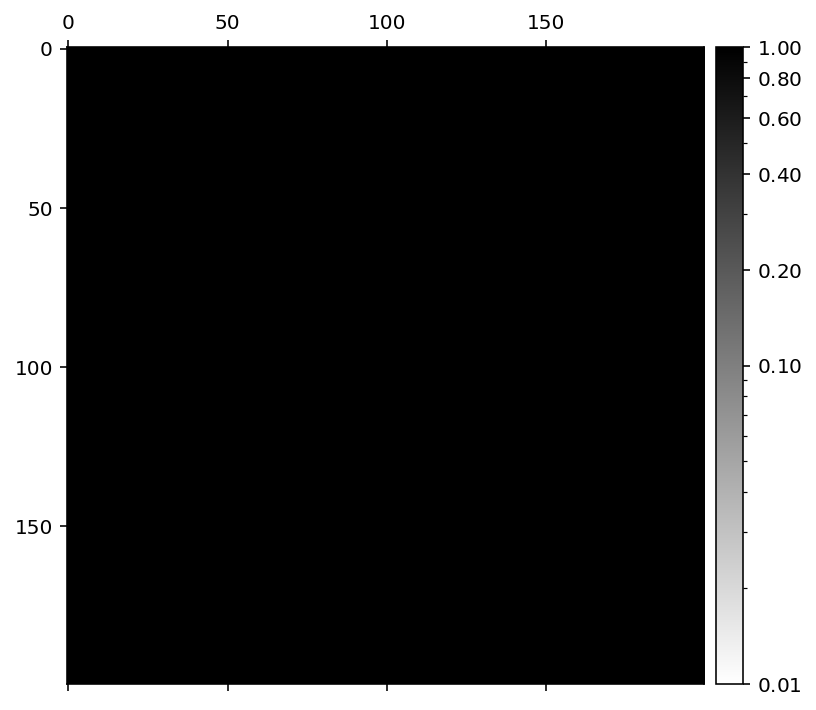

In [429]:
# help(plt.savefig)
# type(im)
from pylab import figure, cm
from matplotlib.colors import LogNorm
C = image*1000
f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
im = ax.matshow(C, cmap=cm.gray_r, norm=LogNorm(vmin=0.01, vmax=1))
t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
f.show()

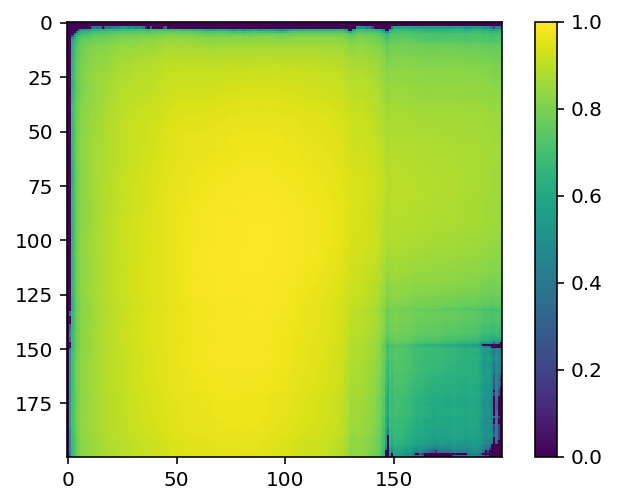

In [513]:
import matplotlib.pyplot as plt
import numpy as np

def log_transform(im):
    '''returns log(image) scaled to the interval [0,1]'''
    try:
        (min, max) = (im[im > 0].min(), im.max())
#          (min, max) = (im.min()+0.001, im.max())        
        if (max > min) and (max > 0):
            return (np.log(im.clip(min, max)) - np.log(min)) / (np.log(max) - np.log(min))
#         return np.log10(im)
    except:
        pass
    return im

a = np.ones((100,100))
for i in range(100): a[i] = i
f = plt.figure()
ax = f.add_subplot(111)
res = ax.imshow(log_transform(imm))
# the colorbar drawn shows [0-1], but I want to see [0-99]
cb = f.colorbar(res)

In [511]:
image.shape
imm = (imm - imm.min()) / 
np.log(imm.min())

/home/ali/miniconda3/envs/CenterNet/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


nan

In [251]:
# plt.imshow(image - image_annt)
# plt.show()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable
# import numpy as np
# plt.figure()
# ax = plt.gca()
# im = ax.imshow(np.arange(100).reshape((10,10)))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
# plt.subplot(1,4,1)
ax1.imshow(image)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('preds')
# plt.subplot(1,4,2)
ax2.imshow(image_annt)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('gts')
ax3.imshow(image - image_annt)
ax3.set_title('preds - gt')
ax3.set_xticks([])
ax3.set_yticks([])
# fig.colorbar(image , ax = ax3)
# ax = plt.gca()
# cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
# plt.colorbar(image, cax=cax)
# plt.subplot(1,4,4)

# ax = plt.gca()
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)


plt.tight_layout()
# plt.colorbar(fraction=.05, pad = 0.1)
plt.show()


In [63]:
img.shape

(529, 640)

In [51]:
# mapp[i['image_id']]
data['annotations']

# with open('/home/ali/markable-production/object_detection_context/datasets/coco/annotations/instances_val2017_invariance_cropBG.json') as json_file:
#     d = json.load(json_file)


NameError: name 'data' is not defined

In [105]:
len(d['images'])

36780

In [80]:
mapp

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 6: 4,
 8: 5,
 10: 6,
 11: 7,
 13: 8,
 14: 9,
 15: 10,
 18: 11,
 22: 12,
 25: 13,
 27: 14,
 28: 15,
 29: 16,
 31: 17,
 37: 18,
 38: 19,
 40: 20,
 43: 21,
 45: 22,
 49: 23,
 53: 24,
 54: 25,
 55: 26,
 56: 27,
 57: 28,
 58: 29,
 59: 30,
 62: 31,
 67: 32,
 68: 33,
 69: 34,
 70: 35,
 71: 36,
 74: 37,
 75: 38,
 76: 39,
 79: 40,
 80: 41,
 82: 42,
 84: 43,
 85: 44,
 86: 45,
 87: 46,
 88: 47,
 90: 48,
 92: 49,
 94: 50,
 96: 51,
 97: 52,
 98: 53,
 100: 54,
 103: 55,
 105: 56,
 106: 57,
 108: 58,
 111: 59,
 114: 60,
 115: 61,
 116: 62,
 119: 63,
 124: 64,
 126: 65,
 127: 66,
 128: 67,
 135: 68,
 136: 69,
 137: 70,
 139: 71,
 144: 72,
 145: 73,
 148: 74,
 149: 75,
 151: 76,
 152: 77,
 155: 78,
 157: 79,
 160: 80,
 166: 81,
 167: 82,
 168: 83,
 172: 84,
 175: 85,
 176: 86,
 178: 87,
 179: 88,
 181: 89,
 182: 90,
 183: 91,
 185: 92,
 186: 93,
 188: 94,
 191: 95,
 195: 96,
 196: 97,
 197: 98,
 199: 99,
 201: 100,
 202: 101,
 204: 102,
 205: 103,
 206: 104,
 212: 105,
 213

In [34]:
# data_gt

In [36]:
with open('/home/ali/markable-production/object_detection_context/outputs_json/voc_coco_format/centernet_pascal_cocostyle.json') as json_file:
    data = json.load(json_file)


In [55]:
len(data)
data[-1]

{'image_id': 4952,
 'category_id': 20,
 'bbox': [37.94873046875,
  22.82317543029785,
  371.8088073730469,
  512.8289184570312],
 'score': 0.013597491197288036}

In [56]:
# labs = [i['name'] for i in data['categories']]
# labs

# data_pred[1]


In [653]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.array(data_pred[0]), np.array(data_target)[0])
accs = matrix.diagonal()/matrix.sum(axis=1)

np.nan_to_num(np.nan)
accs =  np.nan_to_num(accs)




In [617]:
accs.shape

(80,)

In [604]:
np.mean(accs)

0.4874714883610439

In [595]:
# uu = np.unique(np.array(data_target)[0])
# for i in range(497): 
#     print(i, uu[i])

In [564]:
# def indices(l, val):
#    retval = []
#    last = 0
#    while val in l[last:]:
#            i = l[last:].index(val)
#            retval.append(last + i)
#            last += i + 1   
#    return retval

# def class_accuracy(y_pred, y_true, cls):
#     index = indices(1, cls)
#     y_pred, y_true = ypred[index], y_true[index]
#     tp = [1 for k in range(len(y_pred)) if y_true[k]==y_pred[k]]
#     tp = np.sum(tp)
#     return tp/float(len(y_pred))


# class_accuracy(np.array(data_pred[0]), np.array(data_target)[0], 500)
    


In [551]:
# # help(np.nan_to_num)
# matrix.shape

# from sklearn.metrics import classification_report
# p = classification_report(np.array(data_target)[0], np.array(data_pred[0]), target_names=labels[:497])

In [540]:
# # np.nan_to_num(np.nan)

# accs = []
# for i in range(500):
#     accs.append(np.sum(np.array(data_target[0])==i) / len(np.array(data_target[0])))
# # np.min(np.array(data_target[0]))

In [606]:
# accs


In [655]:
len(labels)

20

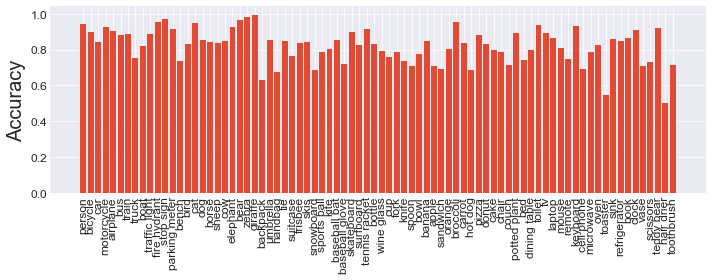

In [656]:
plt.style.use('ggplot')
# create a color palette
palette = plt.get_cmap('Set1')
plt.style.use('seaborn-darkgrid')


import class_names

import importlib
importlib.reload(class_names)


labels = class_names.labels['coco']
# labels = labels[:102] + labels[103:133] + labels[134:459] + labels[460:]

x = np.arange(len(labels))

# accs = matrix.diagonal()/matrix.sum(axis=1)
# accs.shape


fig, ax = plt.subplots(figsize=(10,4))
import matplotlib.pyplot as plt
plt.bar(x, accs)
# plt.ylabel('acc.')
# plt.xlabel('class name')

ax.set_ylabel('Accuracy', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)



fig.tight_layout()
plt.show()

# fig.savefig('markable.png')



In [480]:
class_names.labels.keys()

len(class_names.labels['openImages'])

500

In [657]:
print(list(accs))

[0.9414513711312935, 0.8996655518394648, 0.8432223830197781, 0.9241573033707865, 0.9054054054054054, 0.8812949640287769, 0.8894736842105263, 0.7507418397626113, 0.8186274509803921, 0.8844221105527639, 0.9560439560439561, 0.971830985915493, 0.9148936170212766, 0.7368421052631579, 0.8317307692307693, 0.9458128078817734, 0.8558139534883721, 0.8428571428571429, 0.8337801608579088, 0.8457300275482094, 0.9233716475095786, 0.9672131147540983, 0.9813432835820896, 0.9913419913419913, 0.6285714285714286, 0.8533653846153846, 0.6718446601941748, 0.8502202643171806, 0.7632508833922261, 0.8373983739837398, 0.8395061728395061, 0.6875, 0.7870036101083032, 0.8039772727272727, 0.8507462686567164, 0.7191780821917808, 0.8971428571428571, 0.8267716535433071, 0.9146919431279621, 0.8315988647114475, 0.7915407854984894, 0.758957654723127, 0.784688995215311, 0.7365079365079366, 0.7083333333333334, 0.7772511848341233, 0.8483290488431876, 0.7054263565891473, 0.6910112359550562, 0.8028169014084507, 0.955974842767

In [658]:
print(labels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [476]:

# only for openImages 
# changing the annotations IDs from 0 to 499 to 1: 500



# data['categories']

# for idx,i in enumerate(data['categories'],1):
#     i['id'] = idx 

# for i in data['annotations']:
#     i['category_id'] += 1 
    
# with open('../datasets/openImages/detection_annotation/validation_new.json', 'w') as json_file2:
#     json.dump(data, json_file2)    
    
    
    
    
    
# data['categories']
                    
# [{'supercategory': 'person', 'id': 1, 'name': 'person'},
    

In [402]:
data.keys()
# ['categories']
# data['annotations']




dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [17]:
max(data_pred[0])
# max(data_target[0])

# res[1]

# data_target


499

In [79]:
import os
dataset = 'markable'



valid_ids = [
  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 
  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
  24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 
  37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 
  48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 
  58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 
  72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 
  82, 84, 85, 86, 87, 88, 89, 90]
#     cat_ids = {v: i for i, v in enumerate(valid_ids, 1)}



res = []
for idx, i in enumerate(data['annotations']):
    p = dict()
    p['image_id'] = i['image_id']
    
    p['category_id'] = data_pred[0][idx] + 1
    
    if 'coco' in dataset:  
        p['category_id'] = valid_ids[data_pred[0][idx]]
        
    if 'openImages' in dataset:  
        p['category_id'] = data_pred[0][idx] #i['category_id']  #
        
        
        
    p['bbox'] = i['bbox']
    p['score'] = data_pred[1][idx]
    
    res.append(p)
   

with open(os.path.join('../results_ub/', dataset, dataset+'_ub.json'), 'w') as json_file:
    json.dump(res, json_file)
#     i['annotations']['category_id'] = data_pred[idx]
    

In [70]:
len(data['annotations'])
# data.keys()
u = 0
print(data['annotations'][u]['category_id'])
print(res[u]['category_id'])
print(data_target[0][u])
print(data_pred[0][u])
data['annotations'][2]

314
314
314
314


{'area': 697344,
 'bbox': [218, 203, 41, 38],
 'segmentation': [],
 'category_id': 303,
 'id': 4,
 'image_id': 31049,
 'iscrowd': '0'}

In [80]:
res[2]

{'image_id': 206530,
 'category_id': 3,
 'bbox': [438.0, 532.0, 121.0, 106.0],
 'score': 0.04480566456913948}

In [305]:
'openImages' in dataset

True

In [336]:
# with open('../datasets/markable/annotations/markable_test.json') as json_file:
#     data = json.load(json_file)

data_pred[1][-1]
data.keys()
# data['annotations']
# data['categories']

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [3]:
data['annotations'][10000]

{'area': 696320,
 'bbox': [715, 585, 42, 54],
 'segmentation': [],
 'category_id': 73,
 'id': 10002,
 'image_id': 21953,
 'iscrowd': '0'}

In [239]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [269]:
res[1]

{'image_id': 31049,
 'category_id': 303,
 'bbox': [144, 460, 39, 38],
 'score': 12.10605239868164}

In [5]:
import numpy as np
np.mean(np.array(data_pred[0])==np.array(data_target[0]))

0.6622959203918681

In [75]:
data.keys()
# data['categories']

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [114]:
print(res[0])
print(data['annotations'][0])
print(data_pred[0][idx])

{'image_id': 206530, 'category_id': 25, 'bbox': [254.0, 0.0, 222.0, 284.0], 'score': 1}
{'segmentation': [], 'gender': -1, 'area': 63048.0, 'iscrowd': 0, 'image_id': 206530, 'bbox': [254.0, 0.0, 222.0, 284.0], 'category_id': 13, 'id': 776172}
13


In [32]:
# # root_dir='markable'
# root_dir='coco'

# mapp = {}
# ws = {}
# hs = {}
# for k in data['images']:
#     mapp[k['id']] = k['file_name']
#     ws[k['id']]   = k['width']
#     hs[k['id']]   = k['height']

# annot = []

# if ('markable' in root_dir) or ('voc' in root_dir):
#     # inverted_dict = dict([[v,k] for k,v in mapp.items()])
#     for i in data['annotations']:
#        annot.append({'box':i['bbox'], 'category_id':i['category_id'], 'file_name': mapp[i['image_id']], 'im_w': ws[i['image_id']], 'im_h': hs[i['image_id']]})

# if 'coco' in root_dir:    
#     valid_ids = [
#       1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 
#       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
#       24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 
#       37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 
#       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 
#       58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 
#       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 
#       82, 84, 85, 86, 87, 88, 89, 90]
#     cat_ids = {v: i for i, v in enumerate(valid_ids, 1)}

#     # inverted_dict = dict([[v,k] for k,v in mapp.items()])
#     for i in data['annotations']:
#        annot.append({'box':i['bbox'], 'category_id':cat_ids[i['category_id']], 'file_name': mapp[i['image_id']], 'im_w': ws[i['image_id']], 'im_h': hs[i['image_id']]})

# if 'openImages' in root_dir:  # category starts from 0          
#     for i in data['annotations']:  
#        annot.append({'box':i['bbox'], 'category_id':i['category_id']+1, 'file_name': mapp[i['image_id']], 'im_w': ws[i['image_id']], 'im_h': hs[i['image_id']]})



In [85]:
len(annot)


36781

In [123]:
annot[0]

{'box': [473.07, 395.93, 38.65, 28.67],
 'category_id': 17,
 'file_name': '000000289343.jpg',
 'im_w': 529,
 'im_h': 640}

In [64]:
with open('../output/coco/1/predictions.pkl', 'rb') as predf:
    data_pred = pickle.load(predf)
with open('../output/coco/1/target.pkl', 'rb') as predf:
    data_target = pickle.load(predf)

print(len(data_pred[0]))
print(len(data_target[0]))

36781
36781


In [77]:
import numpy as np
np.mean(np.array(data_pred[0])==np.array(data_target[0]))

0.8826830640872739

In [93]:
res = []
for idx, i in enumerate(data['annotations']):
    p = dict()
    p['image_id'] = i['image_id']
    p['category_id'] = data_pred[0][idx] + 1
    p['bbox'] = i['bbox']
    p['score'] = 1
    
    res.append(p)
#     i['annotations']['category_id'] = data_pred[idx]
    

In [94]:
res[0]

{'image_id': 289343,
 'category_id': 17,
 'bbox': [473.07, 395.93, 38.65, 28.67],
 'score': 1}

In [320]:
res[0]
data['annotations'][0]
# data_pred[0]



#  'area': 702.1057499999998,
#  'iscrowd': 0,
#  'image_id': 289343,
#  'bbox': [473.07, 395.93, 38.65, 28.67],
#  'category_id': 18,
#  'id': 1768}

# {'image_id': 206530,
#  'category_id': 3,
#  'bbox': [219.22, 509.07, 112.3, 112.56],
#  'score': 0.88}


{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [76]:
data_target[0]

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,


In [ ]:
for i in res:
    i[17] = 

In [198]:
len(data['annotations'])
data['annotations'][0]

{'segmentation': [],
 'gender': -1,
 'area': 63048.0,
 'iscrowd': 0,
 'image_id': 206530,
 'bbox': [254.0, 0.0, 222.0, 284.0],
 'category_id': 13,
 'id': 776172}

In [8]:
with open('../output/markable/1/target.pkl', 'rb') as predf:
    data_target = pickle.load(predf)

In [9]:
data_target[0]
len(data_target[0])


96845

In [10]:
with open('../output/markable/1/predictions.pkl', 'rb') as predf:
    data_pred = pickle.load(predf)


In [12]:
len(data_pred[0])
# data_pred[0]

96845

In [135]:
# {'image_id': 258179,
#  'category_id': 40,
#  'bbox': [411.94, 947.23, 162.3, 78.81],
#  'score': 0.03}

pred_boxes = data2.copy()
for idx, i in enumerate(pred_boxes):
    i['category_id'] = pred[0][idx]



IndexError: list index out of range

In [137]:

with open('../results_ub/markable_test_cocostyle/bbox.json', 'rb') as predf:
    data_pred = json.load(predf)

data_pred

[{'image_id': 206530,
  'category_id': 3,
  'bbox': [218.1109161376953,
   508.45849609375,
   114.02351379394531,
   113.5653076171875],
  'score': 0.7605239748954773},
 {'image_id': 206530,
  'category_id': 3,
  'bbox': [438.3753967285156,
   528.1065063476562,
   123.80093383789062,
   111.0848388671875],
  'score': 0.8045628070831299},
 {'image_id': 206530,
  'category_id': 4,
  'bbox': [68.39727783203125,
   173.6684112548828,
   149.6848602294922,
   155.33961486816406],
  'score': 0.31159576773643494},
 {'image_id': 206530,
  'category_id': 6,
  'bbox': [255.285888671875,
   0.64093017578125,
   221.71542358398438,
   286.9390563964844],
  'score': 0.33527177572250366},
 {'image_id': 206530,
  'category_id': 7,
  'bbox': [254.3603515625,
   0.527722179889679,
   222.727294921875,
   286.9305419921875],
  'score': 0.3597802221775055},
 {'image_id': 206530,
  'category_id': 8,
  'bbox': [254.875, 0.11773681640625, 222.17831420898438, 287.6500549316406],
  'score': 0.21686176955699

In [139]:
print(len(data_annt['annotations']))
print(len(data_res))
print(len(data_pred))    
    

193689
5165398
1882668


In [143]:
# len(data_res)
data_annt['annotations'][0]

{'segmentation': [],
 'gender': -1,
 'area': 63048.0,
 'iscrowd': 0,
 'image_id': 206530,
 'bbox': [254.0, 0.0, 222.0, 284.0],
 'category_id': 13,
 'id': 776172}

In [118]:
data2[-1]

{'image_id': 258179,
 'category_id': 40,
 'bbox': [411.94, 947.23, 162.3, 78.81],
 'score': 0.03}

In [91]:
data.keys()
list(data['categories'])

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'},
 {'supercategory': 'none', 'id': 5, 'name': 'bottle'},
 {'supercategory': 'none', 'id': 6, 'name': 'bus'},
 {'supercategory': 'none', 'id': 7, 'name': 'car'},
 {'supercategory': 'none', 'id': 8, 'name': 'cat'},
 {'supercategory': 'none', 'id': 9, 'name': 'chair'},
 {'supercategory': 'none', 'id': 10, 'name': 'cow'},
 {'supercategory': 'none', 'id': 11, 'name': 'diningtable'},
 {'supercategory': 'none', 'id': 12, 'name': 'dog'},
 {'supercategory': 'none', 'id': 13, 'name': 'horse'},
 {'supercategory': 'none', 'id': 14, 'name': 'motorbike'},
 {'supercategory': 'none', 'id': 15, 'name': 'person'},
 {'supercategory': 'none', 'id': 16, 'name': 'pottedplant'},
 {'supercategory': 'none', 'id': 17, 'name': 'sheep'},
 {'supercategory': 'none', 'id': 18, 'name': 'sofa'},
 {'super

In [106]:
# for i in range(len())
len(data['annotations'])
data['annotations'][0]


{'segmentation': [[33, 10, 33, 293, 448, 293, 448, 10]],
 'area': 117445,
 'iscrowd': 0,
 'image_id': 2008000002,
 'bbox': [33, 10, 415, 283],
 'category_id': 20,
 'id': 1,
 'ignore': 0}

In [88]:
!pwd

/home/ali/markable-production/object_detection_context/utils


In [110]:
print(len(pred[0]))
print(len(data['annotations']))


14976
14976


In [ ]:
for i in annot:
    image_hash = annot['file_name'] #annot.name
    obj_cat = annot['category_id'] - 1 # borji should be an integer  !!!!!!!!!!
    
    obj_bbox = annot['box']
    bb = np.array(obj_bbox)
    bb = bb.astype(int)   # x y w h
    bb[2:] += bb[:2] 

    image_path = os.path.join(self.img_dir,  # 
                            image_hash ) #+
                            #   ".jpg"
                            # )

    image = self.load(image_path)
    image = image.transpose(1,0,2)

    image_crop = image[bb[0]:bb[2], bb[1]:bb[3],  :]    
    image_crop = image_crop.transpose(1,0,2)
    
    img = self.transforms(image_crop)
    
    # run the model on it now 
    
    
    

In [67]:
import os
import sys
sys.path.insert(0, "context")
import logging
import time
import warnings
import pickle
import random
import argparse
import shutil
import numpy as np

from mmcv import Config

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed


In [76]:
import torchvision

from model import resnet
from model.MobileNetV2 import MobileNetV2
from dataset.context_dataset import ContextDataset


ModuleNotFoundError: No module named 'model'

In [78]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_dataset = ContextDataset(
    args.root_dir,
    args.train_json,
    args.img_dir, 
    transforms.Compose([
        transforms.Resize((224,224)),
        # transforms.RandomResizedCrop(224),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        normalize,
    ]), 
    context_alpha = args.context_alpha, 
    context_only = args.context_only)


test_dataset = ContextDataset(
    args.root_dir,
    args.test_json,
    args.img_dir, 
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize,
    ]), 
    context_alpha = args.context_alpha, 
    context_only = args.context_only)

NameError: name 'ContextDataset' is not defined

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=args.batch_size, shuffle=(train_sampler is None),
    num_workers=args.num_workers, pin_memory=True, sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=args.batch_size, shuffle=False,
    num_workers=args.num_workers, pin_memory=True, sampler=test_sampler)


In [ ]:


model = resnet.__dict__[args.arch](pretrained=False, num_cats=args.num_classes) #num_gender=2, num_age_groups=3)
state_dict = resnet.load_state_dict_from_url(resnet.model_urls[args.arch], progress=True)
model.load_state_dict(state_dict, strict=False)





In [74]:
!pwd
!ls ..
!conda env list

/home/ali/markable-production/object_detection_context/utils
configs   datasets_orig       output		 README.md   train_net.py
context   eg_log.py	      output_context	 results_ub  train.sh
datasets  model_best.pth.tar  pretrained_models  test.sh     utils
# conda environments:
#
                         /home/ali/.pyenv/versions/miniconda3-latest
                         /home/ali/.pyenv/versions/miniconda3-latest/envs/ali3
base                     /home/ali/miniconda3
-centerNet               /home/ali/miniconda3/envs/-centerNet
CRAFT                    /home/ali/miniconda3/envs/CRAFT
CenterNet             *  /home/ali/miniconda3/envs/CenterNet
deploy3                  /home/ali/miniconda3/envs/deploy3
deployNew                /home/ali/miniconda3/envs/deployNew
east-text                /home/ali/miniconda3/envs/east-text
markable-cv-image        /home/ali/miniconda3/envs/markable-cv-image
maskrcnn                 /home/ali/miniconda3/envs/maskrcnn
ssd                      /home/ali/mi

In [53]:
data.keys()
list(data['categories'])

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [54]:
valid_ids = [
  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 
  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
  24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 
  37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 
  48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 
  58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 
  72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 
  82, 84, 85, 86, 87, 88, 89, 90]
cat_ids = {v: i for i, v in enumerate(valid_ids,1)}

In [56]:
cat_ids

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 27: 25,
 28: 26,
 31: 27,
 32: 28,
 33: 29,
 34: 30,
 35: 31,
 36: 32,
 37: 33,
 38: 34,
 39: 35,
 40: 36,
 41: 37,
 42: 38,
 43: 39,
 44: 40,
 46: 41,
 47: 42,
 48: 43,
 49: 44,
 50: 45,
 51: 46,
 52: 47,
 53: 48,
 54: 49,
 55: 50,
 56: 51,
 57: 52,
 58: 53,
 59: 54,
 60: 55,
 61: 56,
 62: 57,
 63: 58,
 64: 59,
 65: 60,
 67: 61,
 70: 62,
 72: 63,
 73: 64,
 74: 65,
 75: 66,
 76: 67,
 77: 68,
 78: 69,
 79: 70,
 80: 71,
 81: 72,
 82: 73,
 84: 74,
 85: 75,
 86: 76,
 87: 77,
 88: 78,
 89: 79,
 90: 80}

In [40]:
# for i in range(len())
len(data['annotations'])
data['annotations'][0]
list(data['categories'])


[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'},
 {'supercategory': 'none', 'id': 5, 'name': 'bottle'},
 {'supercategory': 'none', 'id': 6, 'name': 'bus'},
 {'supercategory': 'none', 'id': 7, 'name': 'car'},
 {'supercategory': 'none', 'id': 8, 'name': 'cat'},
 {'supercategory': 'none', 'id': 9, 'name': 'chair'},
 {'supercategory': 'none', 'id': 10, 'name': 'cow'},
 {'supercategory': 'none', 'id': 11, 'name': 'diningtable'},
 {'supercategory': 'none', 'id': 12, 'name': 'dog'},
 {'supercategory': 'none', 'id': 13, 'name': 'horse'},
 {'supercategory': 'none', 'id': 14, 'name': 'motorbike'},
 {'supercategory': 'none', 'id': 15, 'name': 'person'},
 {'supercategory': 'none', 'id': 16, 'name': 'pottedplant'},
 {'supercategory': 'none', 'id': 17, 'name': 'sheep'},
 {'supercategory': 'none', 'id': 18, 'name': 'sofa'},
 {'super

In [22]:
mapp = {}
ws = {}
hs = {}
for k in data['images']:
    mapp[k['id']] = k['file_name']
    ws[k['id']]   = k['width']
    hs[k['id']]   = k['height']



annot = []
for i in data['annotations']:
   annot.append({'box':i['bbox'], 'category_id':i['category_id'], 'file_name': mapp[i['image_id']], 'im_w': ws[i['image_id']], 'im_h': hs[i['image_id']]})


In [25]:
def load(self, im_path):
    # pil_image = Image.open(im_path).convert("RGB")
    # # convert to BGR
    # # image = np.array(pil_image)[:,:,[2,1,0]]
    # return pil_image

    cv2_image = cv2.imread(im_path)
    cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

In [ ]:
# load the model


In [ ]:
for i in annot:
    image_hash = annot['file_name'] #annot.name
    obj_cat = annot['category_id'] - 1 # borji should be an integer  !!!!!!!!!!
    
    obj_bbox = annot['box']
    bb = np.array(obj_bbox)
    bb = bb.astype(int)   # x y w h
    bb[2:] += bb[:2] 

    image_path = os.path.join(self.img_dir,  # 
                            image_hash ) #+
                            #   ".jpg"
                            # )

    image = self.load(image_path)
    image = image.transpose(1,0,2)

    image_crop = image[bb[0]:bb[2], bb[1]:bb[3],  :]    
    image_crop = image_crop.transpose(1,0,2)
    
    img = self.transforms(image_crop)
    
    # run the model on it now 
    
    
    
    

In [3]:
data['images']

[{'file_name': 'md1b0e67187faa60062702e194bc13b0c4.jpg',
  'height': 640,
  'width': 640,
  'id': 206530,
  'license': -1,
  'image_url': '',
  'date_captured': '2018-05-17'},
 {'file_name': 'mde27fb3e1554354c3fd30a781a9bdaf1a.jpg',
  'height': 1304,
  'width': 913,
  'id': 206531,
  'license': -1,
  'image_url': '',
  'date_captured': '2018-05-17'},
 {'file_name': 'md6d4e50e02ad7d60f578734bec7f9f432.jpg',
  'height': 1345,
  'width': 1080,
  'id': 206532,
  'license': -1,
  'image_url': '',
  'date_captured': '2018-05-16'},
 {'file_name': 'md206da6af8867d0f44d7864f3b2f02ed7.jpg',
  'height': 1080,
  'width': 1080,
  'id': 206533,
  'license': -1,
  'image_url': '',
  'date_captured': '2018-05-16'},
 {'file_name': 'md18bf424cae82b2f6ed8f233c61220333.jpg',
  'height': 625,
  'width': 500,
  'id': 206534,
  'license': -1,
  'image_url': '',
  'date_captured': '2018-05-17'},
 {'file_name': 'md3de01474ac648968666fbaa9d0d8112a.jpg',
  'height': 1674,
  'width': 1200,
  'id': 206535,
  'lice

In [7]:
import json
with open('/home/ali/CenterNet/exp/ctdet/markable_dla/results.json') as json_file:
    data2 = json.load(json_file)


In [17]:
data2[-1]

{'image_id': 258179,
 'category_id': 40,
 'bbox': [411.94, 947.23, 162.3, 78.81],
 'score': 0.03}

In [18]:
len(data2)

5165398

In [6]:
!pwd

/home/ali/markable-production/object_detection_context/utils
